In [ ]:
+---------+------------------+-----------------+
| Class   |   Training Count |   Testing Count |
+=========+==================+=================+
| Class 0 |             5923 |             980 |
+---------+------------------+-----------------+
| Class 1 |             6742 |            1135 |
+---------+------------------+-----------------+
| Class 2 |             5958 |            1032 |
+---------+------------------+-----------------+
| Class 3 |             6131 |            1010 |
+---------+------------------+-----------------+
| Class 4 |             5842 |             982 |
+---------+------------------+-----------------+
| Class 5 |             5421 |             892 |
+---------+------------------+-----------------+
| Class 6 |             5918 |             958 |
+---------+------------------+-----------------+
| Class 7 |             6265 |            1028 |
+---------+------------------+-----------------+
| Class 8 |             5851 |             974 |
+---------+------------------+-----------------+
| Class 9 |             5949 |            1009 |
+---------+------------------+-----------------+
Total Count
Training	59,000
Testing	    10,000

In [9]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
#https://www.geeksforgeeks.org/differences-and-applications-of-list-tuple-set-and-dictionary-in-python/ 
#https://medium.com/@jodancker/a-brief-introduction-to-distance-measures-ac89cbd2298 


In [2]:
def load_mnist_images_from_folder(folder_path):

    images = []
    labels = []
    for label in sorted(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, label)
        if os.path.isdir(class_path):
            for img_file in tqdm(os.listdir(class_path), desc=f"Loading {label}"):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (28, 28))
                images.append(img.flatten())
                labels.append(int(label))
    return np.array(images), np.array(labels)


In [3]:
def train_knn_model(mnist_dir, k=3):
    train_dir = os.path.join(mnist_dir, "Training")
    test_dir = os.path.join(mnist_dir, "Testing")

    print("Loading training data...")
    X_train, y_train = load_mnist_images_from_folder(train_dir)

    print("Loading test data...")
    X_test, y_test = load_mnist_images_from_folder(test_dir)

    print(f"\n=== Training KNN | K = {k} ===")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    joblib.dump(knn, "knn_mnist_model.pkl")
    print("\n Model saved as 'knn_mnist_model.pkl'")


In [4]:
# Set your dataset path
MNIST_DIR = "D:\\JupyterNotebooks\\KNN\\MNIST"  
train_knn_model(MNIST_DIR, k=3)


Loading training data...


Loading 9: 100%|██████████████████████████████████████████████████████████████████████████████| 5949/5949 [00:01<00:00, 3921.68it/s]


Loading test data...


Loading 9: 100%|██████████████████████████████████████████████████████████████████████████████| 1009/1009 [00:00<00:00, 4355.53it/s]



=== Training KNN | K = 3 ===
Accuracy: 0.9698
Confusion Matrix:
 [[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  10    9  997    2    0    0    0   13    1    0]
 [   0    2    4  975    1   14    1    7    3    3]
 [   1    5    0    0  952    0    4    2    0   18]
 [   6    1    0   13    2  859    5    1    1    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   23    5    0    1    0    0  989    0   10]
 [   9    2    4   17    8   13    3    5  909    4]
 [   3    5    2    7    9    3    1    9    2  968]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.96      0.96       892


In [10]:
def infer_user_image(model_path, image_path):
    """
    Predict digit from user image using saved KNN model.
    """
    if not os.path.exists(model_path):
        print(f"Model file '{model_path}' not found.")
        return
    if not os.path.exists(image_path):
        print(f"Image file '{image_path}' not found.")
        return

    model = joblib.load(model_path)

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img_flattened = img.flatten().reshape(1, -1)

    prediction = model.predict(img_flattened)[0]
    print(f"Prediction for image '{image_path}': {prediction}")
    # Display original image using matplotlib
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {prediction}")
    plt.axis('off')
    plt.show()



In [ ]:
# Test with a new user image
user_image_path = "path/to/user_digit_image.png"  # ⬅️ Replace with actual image path
infer_user_image("knn_mnist_model.pkl", user_image_path)


In [5]:
# Test with a new user image by taking the file path input from the user
user_image_path = input("Enter the path of your digit image: ")  # Takes user input for the image path

infer_user_image("knn_mnist_model.pkl", user_image_path)


Enter the path of your digit image:  s


❌ Model file 'knn_mnist_model.pkl' not found.


Selected image: D:/JupyterNotebooks/KNN/MNIST/Training/1/3.jpg
Prediction for image 'D:/JupyterNotebooks/KNN/MNIST/Training/1/3.jpg': 1


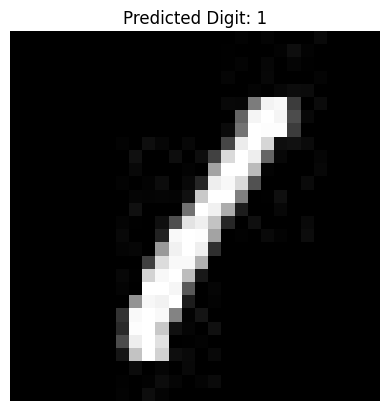

In [11]:
# Create a Tkinter root window (it won't be shown)
root = tk.Tk()
root.withdraw()  # Hide the root window

# Open file dialog to select an image
user_image_path = filedialog.askopenfilename(title="Select your digit image", filetypes=[("PNG files", "*.png"), ("JPEG files", "*.jpg;*.jpeg"), ("All files", "*.*")])

# If the user selected a file, proceed with inference
if user_image_path:
    print(f"Selected image: {user_image_path}")
    infer_user_image("knn_mnist_model.pkl", user_image_path)
else:
    print("No image selected.")


In [ ]:
# mnist_knn.py

import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def load_mnist_images_from_folder(folder_path):
    images = []
    labels = []
    for label in sorted(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, label)
        if os.path.isdir(class_path):
            for img_file in tqdm(os.listdir(class_path), desc=f"Loading {label}"):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (28, 28))  # ensure fixed shape
                images.append(img.flatten())     # flatten to 1D
                labels.append(int(label))
    return np.array(images), np.array(labels)

def knn_mnist_classification(mnist_dir, k_values=[1, 3, 5]):
    train_dir = os.path.join(mnist_dir, "Training")
    test_dir = os.path.join(mnist_dir, "Testing")

    print("Loading training data...")
    X_train, y_train = load_mnist_images_from_folder(train_dir)

    print("Loading test data...")
    X_test, y_test = load_mnist_images_from_folder(test_dir)

    for k in k_values:
        print(f"\n=== KNN for MNIST Dataset | K = {k} ===")
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))



In [ ]:
knn_mnist_classification(mnist_dir="D:\\JupyterNotebooks\\KNN\\MNIST")
